In [1]:
#подключаем модули
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

In [2]:
U0 = lambda x: np.sin(4 * np.pi * x / L1)

In [24]:
CFL = 0.7
h = 0.5
T = [0, 20]
tau = h * CFL
L= [0, 20]
m = int((L[1]-L[0])/h+1)
n = int((T[1]-T[0])/tau+1)
x = np.linspace(L[0],L[1],m)

In [25]:
def solve(h,CFL,T,L):
    tau = h * CFL
    n = int((T[1]-T[0])/tau+1)
    m = int((L[1]-L[0])/h+1)
    x = np.linspace(L[0],L[1],m)
    u0 = np.zeros(m)
    for i in range(m):
        u0[i] = U0(i*h)
    sol = np.zeros(shape=(n,m))
    sol[0] = u0
    for t in range(n-1):
        for i in range(m-1):
            sol[t + 1,i] = sol[t, i] - CFL * (sol[t,i]-sol[t,i-1])
        sol[t + 1][0] = sol[t + 1][-1]
    return sol

In [26]:
u = solve(h, CFL, [T0,T1],[L0,L1])

MovieWriter imagemagick unavailable; using Pillow instead.


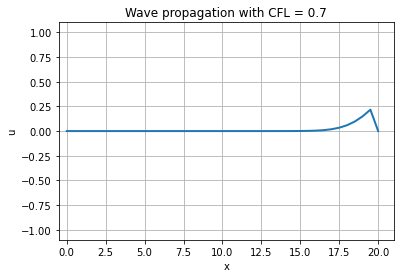

In [27]:
fig = plt.figure()
plt.grid()
ax = plt.axes(xlim=(-0.5, 1.05*max(x)), ylim=(-1.1, 1.1))
ax.grid()
ax.set_title('Wave propagation with CFL = ' + str(CFL))
ax.set_xlabel('x')
ax.set_ylabel('u')

line, = ax.plot([], [], lw=2)

def animate(i):
    line.set_data(x, u[i])
    return line,

anim = FuncAnimation(fig, animate, frames=n, interval=2, blit=True)

anim.save('CFL=0.7_3_new.gif', writer='imagemagick')

In [28]:
Image(url='CFL=0.7_3_new.gif')

In [ ]:
u1 = solve(h, CFL, [T0,T1],[L0,L1])

In [ ]:
u2 = solve(h, CFL/2, [T0,T1],[L0,L1])

In [ ]:
u4 = solve(h, CFL/4, [T0,T1],[L0,L1])

In [ ]:
u8 = solve(h, CFL/8, [T0,T1],[L0,L1])

In [ ]:
tau_slice = 20

In [ ]:
def norm(a):
    n = 0
    for i in a:
        n += i*i
    return np.sqrt(n)

In [ ]:
norm21 = norm(u2[2*tau_slice]-u1[tau_slice])
norm42 = norm(u4[4*tau_slice]-u2[2*tau_slice])
norm84 = norm(u8[8*tau_slice]-u4[4*tau_slice])

In [ ]:
print(norm21)
print(norm42)
print(norm84)

In [ ]:
plt.plot(x, u2[20]-u1[20])